## import

In [1]:
#importing libraries & packages

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import datetime
import re
import pprint
pp = pprint.PrettyPrinter(indent=4)
from collections import Counter
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
raw_df = pd.read_csv('Animal_Control_Incidents.csv')

In [3]:
#preserving original df before making alterations
df = raw_df.copy()

## functions

In [84]:
def comp_counts(cols, labels):
    sns.set(rc={'figure.figsize':(10, 5)})
    plt.xlim(-5,100)
    plt.title("times")
    for col, label in zip(cols, labels):
        print(df[col].value_counts())
        sns.distplot(df[col].value_counts(), label=label, bins=40)
    plt.legend()
    plt.show();

In [5]:
def plot_counts(cols):
    for i, col in enumerate(cols):
        plt.figure(i)
        sns.countplot(y=col, data=df);

In [6]:
def edit_replace(old_words, replacement_word):
#     try:
#         data = data.apply(lambda x: x.astype(str).str.replace(old_word, replacement_word))
#     except:
#         data = data.str.replace(old_word, replacement_word)
    for word in old_words:
        df['color'] = df.color.apply(lambda x: x.replace(word, replacement_word))

In [7]:
def replace_breed(old_words, replacement_word):
    for word in old_words:
        df['breed'] = df.breed.apply(lambda x: x.replace(word, replacement_word))
        #for word in old_words:
          #  data = data.apply(lambda x: x.replace(word, replacement_word))

In [8]:
# seaborn correlation plot for categorical data
def corr_plot(data, minv=-.3, maxv=.3):
    
    #increased minv and/or maxv if too monochromatic
    
    # dummy categorical features
    col_list = list(data.select_dtypes(include=['object']).columns)

    # create dummies for categorical features
    data = pd.DataFrame(pd.get_dummies(data=data,columns=col_list
                       , prefix=col_list))
    sns.set(style="white")
    corr = data.corr()

    # mask the size of covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(10, 10))

    sns.heatmap(corr, mask=mask
                ,annot=False, cmap="YlGnBu", vmin = minv, vmax=maxv, center=0,
                square=True, linewidths=.5,cbar_kws= {"shrink": .5} );
    ax.invert_yaxis();
    
    #prevent the shrink of bottom row
    ax.set_ylim(len(data.columns), 0)

## cleaning/EDA

In [9]:
df.head()

,FILE NUMBER,INCIDENT DATE,INCIDENT TIME,DISPATCHED TIME,CALL TAKER,DISPATCHER,DISPATCHED OTHER,DISPATCHED SITUATION,ARRIVAL TIME,AVAILABLE TIME,...,CONDITION,TEMPERMENT,COLLAR,COLLAR COLOR,VACCINATION NUMBER,VACCINATION DATE,PET NAME,DISPOSITION,DISPOSITION DATE,DISPOSITION OFFICER
0,201639027,12/27/2016,15:30,16:06,UNKNOWN,JENNIFER G,0,D,16:17,16:38,...,FAIR,FRIENDLY,NYLON,RED,NaN,NaN,NaN,TRANS CAA,12/27/2016,FRANK S
1,201639044,12/28/2016,10:06,10:07,UNKNOWN,JENNIFER G,0,D,10:15,10:23,...,FAIR,NORMAL,UNKNOWN,UNKNOWN,NaN,NaN,NaN,RETURN TO WILD,12/28/2016,TRAVIS R
2,201639036,12/28/2016,09:03,09:03,UNKNOWN,JENNIFER G,0,D,09:27,09:45,...,EMACIATED,FRIENDLY,LEATHER,PINK,NaN,NaN,NaN,TRANS CAA,12/28/2016,ISAAC S
3,201639042,12/28/2016,09:46,10:24,UNKNOWN,JENNIFER G,0,D,10:35,10:47,...,EMACIATED,FRIENDLY,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TRANS CAA,12/28/2016,JOHN B
4,201639059,12/28/2016,15:05,15:45,UNKNOWN,JENNIFER G,0,D,16:07,16:25,...,EMACIATED,NORMAL,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TRANS CAA,12/28/2016,SUE H


In [10]:
# removing spaces and lower casing the column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

### datetime conversion

exclude last 30 days?
rec

In [11]:
time_cols= [col for col in df.columns if 'TIME' in col]

In [12]:
for col in time_cols:
    print(df[col].head())

In [13]:
for col in time_cols:
    #df[col] = df[col].dropna()
    df[col] = pd.to_datetime(df[col], format="%H:%M")

In [14]:
date_cols= [col for col in df.columns if 'DATE' in col]

In [15]:
for col in date_cols:
    print(df[col].head())

In [16]:
for col in date_cols:
    #df[col] = df[col].dropna()
    df[col] = pd.to_datetime(df[col], format="%m/%d/%Y")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73303 entries, 0 to 73302
Data columns (total 38 columns):
file_number             73303 non-null int64
incident_date           73303 non-null object
incident_time           72818 non-null object
dispatched_time         62547 non-null object
call_taker              53134 non-null object
dispatcher              60239 non-null object
dispatched_other        73303 non-null int64
dispatched_situation    62537 non-null object
arrival_time            61843 non-null object
available_time          62545 non-null object
complainant_street      73281 non-null object
request_type            40141 non-null object
officer                 61235 non-null object
equipment_number        60251 non-null object
remarks                 2098 non-null object
impound_number          53110 non-null float64
impound_date            53105 non-null object
impound_time            53046 non-null object
location                52867 non-null object
municipality       

In [18]:
pandas_profiling.ProfileReport(df)

Number of variables,38
Number of observations,73303
Total Missing (%),34.8%
Total size in memory,21.3 MiB
Average record size in memory,304.0 B
Numeric,4
Categorical,33
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [19]:
# observations from pandas profile report:

# - lots of columns missing data

# irrelevant columns:
# - ARRIVAL TIME- has most at 00:00
# - AVAILABLE TIME- most at 00:00
# - CALL TAKER
# - COLLAR
# - COLLAR COLOR
# - IMPOUND NUMBER
# - INCIDENT TIME
# - PET NAME
# - REMARKS(too little data provided(3%), existing data doesn't appear to be useful)
# - VACCINATION DATE(99.5% missing)
# - VACCINATION NUMBER
# - ZIP CODE


# columns needing work or consider exclusion:
# - AGE 55% missing
# - X in front of BREED- cross breed?
# - CONDITION 31% missing
# - DISPATCHED OTHER and DISPATCHED SITUATION- what does it mean?
# - EQUIPMENT NUMBER - what does it mean?
# - FILE NUMBER - not unique, is referring to same animal?
# - REQUEST TYPE and SERVICE CODE appear to provide same content
# - SEX contains only 37% M or F, other data missing or irregular
# - SIZE 30% missing
# - SPECIES 28% missing
# - TEMPERMENT 30% missing
# - COLOR 29% missing
# - LOCATION and COMPLAINT STREET can be merged?


In [20]:
df.drop_duplicates(keep=False, inplace=True)

In [21]:
# creating column that fills in missing values from service code using existing values from request type
df['service_type']=df['service_code'].mask(pd.isnull, df['request_type'])

In [22]:
# dropping unneeded columns
df.drop(columns=['file_number', 'service_code', 'request_type'], inplace=True)

### missing data & exclusion

In [23]:
pre_drop_df= df.copy()

In [24]:
#percent missing values per column
round(df.isna().sum()/len(df)*100)

incident_date             0.0
incident_time             1.0
dispatched_time          14.0
call_taker               27.0
dispatcher               18.0
dispatched_other          0.0
dispatched_situation     14.0
arrival_time             15.0
available_time           14.0
complainant_street        0.0
officer                  17.0
equipment_number         18.0
remarks                  97.0
impound_number           28.0
impound_date             28.0
impound_time             28.0
location                 28.0
municipality             28.0
zip_code                 67.0
species                  28.0
breed                    29.0
sex                      45.0
size                     29.0
color                    30.0
age                      55.0
condition                31.0
temperment               30.0
collar                   66.0
collar_color             66.0
vaccination_number       99.0
vaccination_date        100.0
pet_name                 99.0
disposition              28.0
dispositio

In [25]:
# removing columns with more than 1/3 missing data
df.dropna(axis=1, thresh=(len(df)//1.5), inplace=True)

In [26]:
# check diff in value counts if dropna

# col_list = df.columns

# color_value_counts = df.color.value_counts()
# na_drop_color = (df.color.dropna()).value_counts()

## check difference of value counts if dropping all rows with nas:


# for column in col_list:
#    print (df[column].value_counts()/((df[column].dropna()).value_counts()))

In [27]:
df = df.dropna(axis=0)

In [28]:
df = df.apply(lambda x: x.astype(str).str.lower())
df = df.apply(lambda x: x.astype(str).str.strip())
df = df.apply(lambda x: x.astype(str).str.replace(' ', '_'))

In [29]:
df.shape

(19773, 26)

### datetime features

#### times

In [30]:
time_cols= [col for col in df.columns if 'time' in col]
time_cols

['incident_time',
 'dispatched_time',
 'arrival_time',
 'available_time',
 'impound_time']

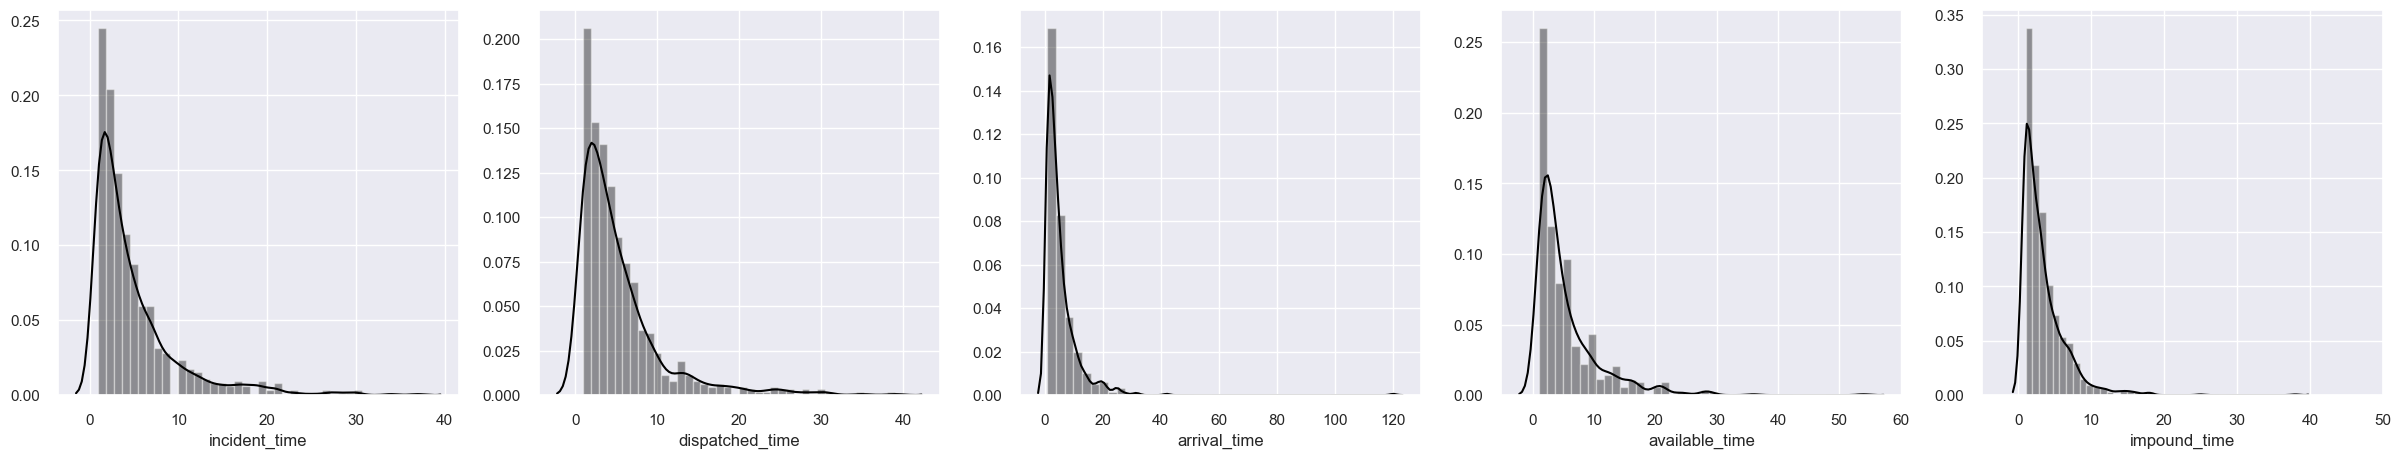

In [88]:
#comparing distribution of time features
#comp_counts(time_cols, time_cols)

sns.set(font_scale=1)

f, axes = plt.subplots(1, 5,figsize=(30,5))
plt.xlim(-5,50)
sns.distplot(df['incident_time'].value_counts(), ax=axes[0], color='black', bins=40)

sns.distplot(df['dispatched_time'].value_counts(), ax=axes[1], color='black',bins=40)

sns.distplot(df['arrival_time'].value_counts(), ax=axes[2], color='black', bins=40)

sns.distplot(df['available_time'].value_counts(), ax=axes[3], color='black', bins=40)

sns.distplot(df['impound_time'].value_counts(), ax=axes[4], color='black', bins=40);

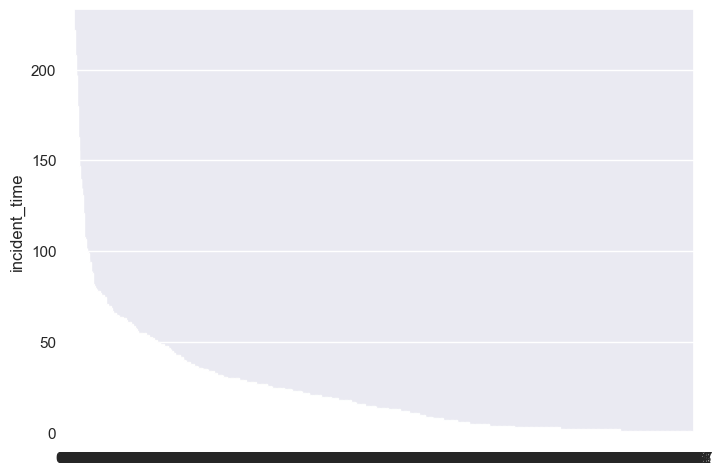

In [32]:
#sns.barplot(x = 'incident_time', y = df['incident_time'].value_counts().values, data = df, ci = None)
sns.barplot(x=df.incident_time.value_counts().index, y=df.incident_time.value_counts())

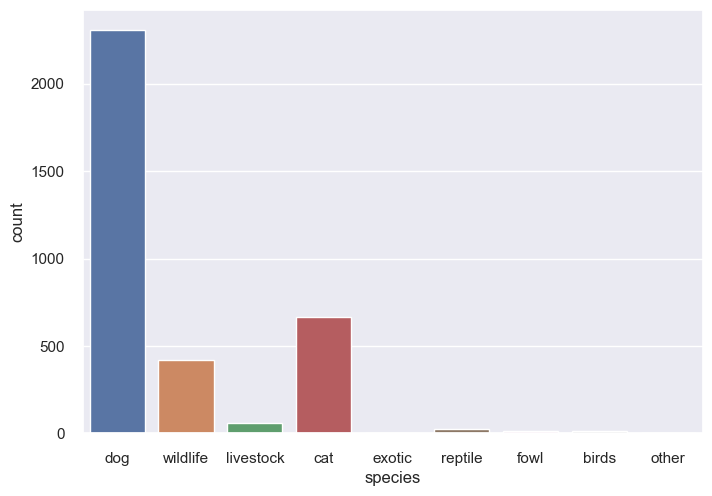

In [89]:
sns.countplot(x='species', data=df);

#### dates

In [34]:
date_cols= [col for col in df.columns if 'date' in col]
date_cols

['incident_date', 'impound_date']

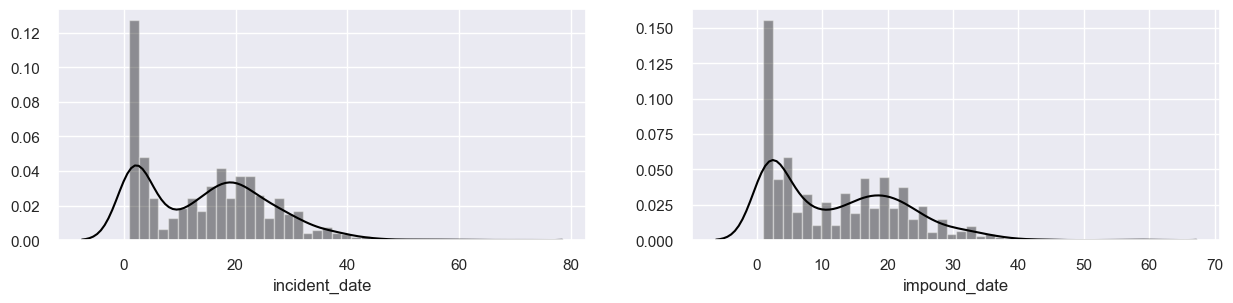

In [35]:
#comparing distribution of date features
#comp_counts(date_cols, date_cols)

sns.set(font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,3))
sns.distplot(df['incident_date'].value_counts(), ax=axes[0], color='black', bins=40)
sns.distplot(df['impound_date'].value_counts(), ax=axes[1], color='black', bins=40);
#sns.distplot(df['disposition_date'].value_counts(), ax=axes[2], color='black', bins=40);

### names

In [36]:
name_cols = ('call_taker', 'dispatcher', 'officer', 'disposition_officer') 

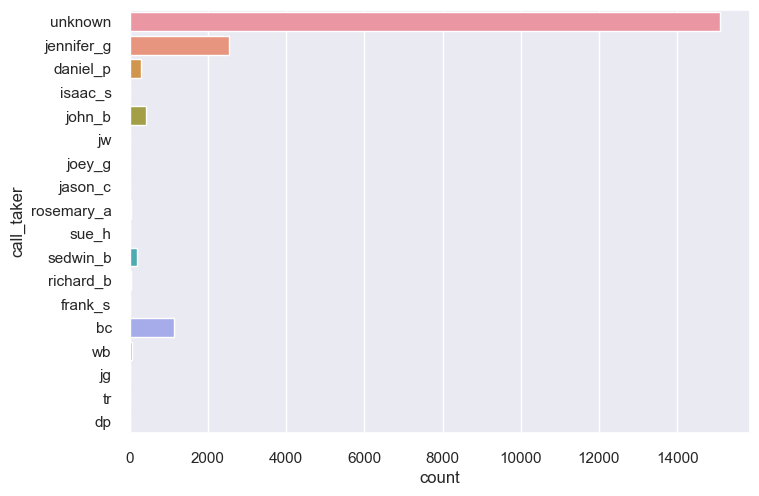

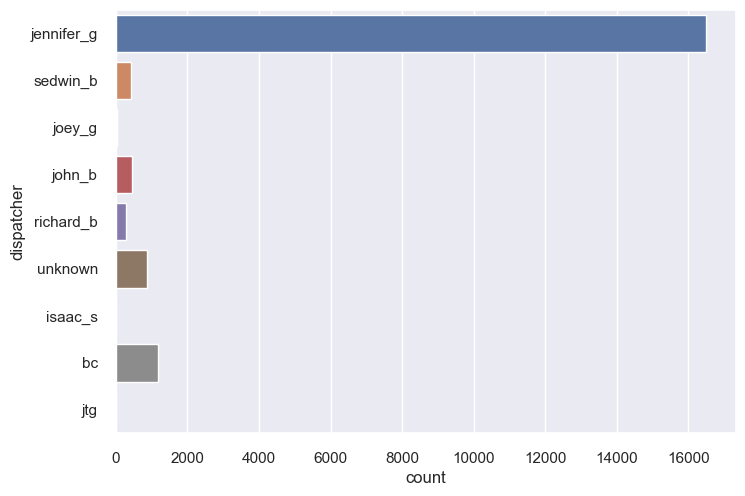

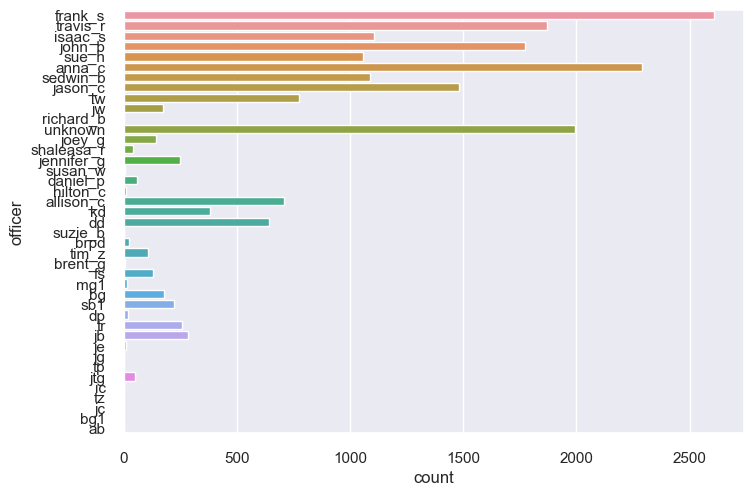

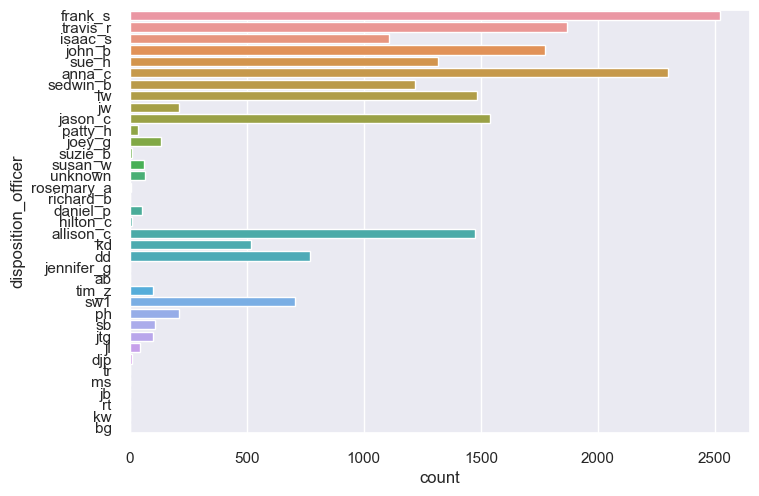

In [37]:
plot_counts(name_cols)

### location related

In [38]:
loc_cols = ('complainant_street', 'municipality', 'location')

### animal features

#### color

In [39]:
df.color.value_counts()

gry                      1903
blk/wht                  1477
blk                      1310
gry/wht                   727
brwn/wht                  716
tan/wht                   609
brwn                      597
brown                     563
tan                       534
blk/tan                   432
gry/blk                   423
grey                      419
blk/gry                   406
blk/brwn                  371
brwn/blk                  370
black                     336
wht                       328
gray                      317
black/white               310
wht/brwn                  268
wht/blk                   250
brindle                   220
org                       201
brown/white               188
wht/tan                   186
wht/gry                   160
white                     157
brindle/wht               156
tan/blk                   147
tan/white                 147
                         ... 
brn/blk/_tan                1
green/red                   1
brindle/bl

Color Feature Cleaning:

- Not liking the all caps, also unnecessary punctuation.


- 1089 unique color values is going to be a problem for machine learning models, so I'd also like to reduce those. Each color needs to have uniform spelling, and combinations with low value counts will be categorized as 'other' to reduce dimensionality and noise.

*_I'll be treating each combination as it's own category. I'm not sure if approaching each color as a separate feature would be practical, but maybe could be given more thought later. I don't see value in each individual color as much as the overall description of color(s) as a whole._

In [40]:
characters = ('_','/', '.', '//','\\', ',,', ',,,')

edit_replace(characters, ',')

In [41]:
# looking at strings separated to evaluate how to edit; priority in high value counts

results = Counter()
df['color'].str.split(',').apply(results.update)
pp.pprint (results)

Counter({   'wht': 6664,
            'blk': 6573,
            'gry': 4335,
            'tan': 3107,
            'brwn': 2991,
            'white': 1512,
            'black': 1339,
            'brown': 1245,
            'grey': 909,
            'gray': 905,
            'brindle': 611,
            'org': 423,
            'brn': 275,
            'tabby': 250,
            'blue': 219,
            'red': 202,
            'yellow': 190,
            'orange': 153,
            'calico': 92,
            'gold': 76,
            'tri': 61,
            'green': 54,
            'cream': 53,
            'blonde': 46,
            'torti': 42,
            'chocolate': 40,
            'choc': 39,
            'fawn': 36,
            'multi': 26,
            'dark': 25,
            'beige': 23,
            'tab': 22,
            'spots': 20,
            'merle': 18,
            'spot': 13,
            'light': 13,
            'pink': 13,
            'golden': 13,
            'chest': 13,
            'w':

In [42]:
#white: wht
whites = ('white', 'cream', 'whute', 'whit', 'whitg', 'wht','whtie', 'wwht', 'what')

edit_replace(whites, 'wht')

In [43]:
# blacks: bl
blacks = ('black', 'blk', 'blkl', 'charcoal', 'bllk', 'balck', 'blavk', 'bkl', 'vlack', 'blavck', 'blkc')

edit_replace(blacks, 'bk')

In [44]:
#browns: br
browns = ('brown', 'brwn', 'brn', 'choc', 'chocolate', 'brwon', 'choclate', 'brw', 'brownish', 'brow', 'brnlate', 'brnish', 'brnolate', 'brnm', 'brolate', 'brblk','chestnut', 'cho', 'brrwn')

edit_replace(browns,'br')

In [45]:
#greys: gry
greys = ('grey', 'gray', 'grrey', 'grey', 'gry')

edit_replace(greys, 'gry')

In [46]:
# tans/beige/blonde: tn
tans = ('beige', 'blonde', 'golden', 'tan\\', 'goldish', 'tna', 'gold', 'tan', 'taan', 'sandy')

edit_replace(tans, 'tn')

In [47]:
# stripes: stripe_tabby
tabbies = ('tabby','tiger', 'tabble', 'taddy', 'tabs', 'tabbie')

edit_replace(tabbies, 'tab')

In [48]:
# striped: strip
# edit_replace('stripe', 'strip')

In [49]:
#orange: or
oranges = ('orange','org', 'orn', 'copper', 'orang', 'orage')

edit_replace(oranges, 'or')

In [50]:
#brindle/fawn: brndl
brindles = ('brindle', 'fawn', 'merle', 'torti', 'marbled', 'tortie', 'bridle', 'brndl', 'brndle', 'brndlee','leopard', 'tortoise', 'brindlw', 'brindlde')

edit_replace(brindles, 'bndle')

In [51]:
#yellow: ylw
edit_replace(('yellow','yelow','yellw', 'yell'), 'ylw')

In [52]:
# stop words and not decribing color
to_drop = (',chest','and', 'normal')

edit_replace(to_drop, '')

In [53]:
# other and unknown in nan category
unknowns = ('other', 'unknown')

edit_replace(unknowns, 'nan')

In [54]:
#limiting colors to selected and also only with certain value count(no longer using this method)

#colors = ('wht', 'bk', 'gry', 'br', 'tn', 'spot', 'or', 'tab', 'blue', 'red', 'ylw', 'calico', 'tri', 'green', 'multi', 'dark', 'light', 'pink')

#ndf = df[~df['color'].isin([colors])]

#ndf = ndf[ndf.color.value_counts()>=20]

#ndf.color.value_counts()

In [55]:
# defining counts to separate at 20 value counts
counts = df['color'].value_counts()

In [56]:
# color combinations with less than 20 counts will be categorized as 'other'
other_color_df =df[df['color'].isin(counts[counts < 20].index)]

other_color_df['color'] = 'other'

/Users/Janelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [57]:
#should be one value: 'other'
other_color_df.color.value_counts()

other    1118
Name: color, dtype: int64

In [58]:
# color values with over/equal to 20 counts
colors_df =df[df['color'].isin(counts[counts >= 20].index)]

In [59]:
#should be 20 or more per value
colors_df.color.value_counts().tail()

tn,gry        22
bk,ylw        21
gry,tn,wht    21
wht,bk,tn     21
wht,gry,bk    20
Name: color, dtype: int64

In [60]:
#joining the 'other color' and 'all colors' dfs
ec_df = pd.concat([colors_df,other_color_df ])
len(ec_df)

19773

In [61]:
#all should have a minimum 20 value counts, 'other' should now be included
ec_df.color.value_counts()

gry           2639
bk,wht        1895
bk            1654
br            1271
other         1118
gry,wht       1061
br,wht        1019
tn,wht         825
tn             618
gry,bk         617
bk,gry         594
bk,tn          553
br,bk          512
wht            509
bk,br          480
wht,br         373
wht,bk         312
bndle          288
wht,gry        263
or             250
wht,tn         247
bndle,wht      234
tn,bk          188
gry,tn         186
or,wht         166
ylw            109
bk,tn,wht      108
blue,wht       107
br,gry         105
br,tn          102
              ... 
gry,tab         87
calico          86
br,bk,wht       69
gry,br          67
bk,gry,wht      64
blue            58
tri             55
tab             45
wht,bndle       45
gry,bk,wht      44
tn,bk,wht       44
tn,br           41
br,wht,bk       40
red,wht         38
wht,bk,br       36
br,bndle        32
wht,br,bk       31
bk,or           28
multi           26
br,tab          26
bk,wht,tn       25
wht,or      

In [62]:
len(ec_df)

19773

In [63]:
# results = Counter()
# df['color'].str.split(',').apply(results.update)
# pp.pprint (results)

#### breed

In [64]:
df.breed.value_counts().head(40)

dsh                             4357
possum                          2188
xpit_bull                       2015
pitbull                         1522
raccoon                         1449
xlabrador                       1010
pit                              894
xterrier                         487
terrier                          417
xshepherd                        368
german_shepherd                  302
labrador_retriever               297
dmh                              249
other                            229
xgerman_shepherd                 222
dlh                              194
xhound                           184
chihuahua                        168
xchihuahua                       163
horse                            149
snake_domestic_non_poisonous     136
squirrel                         127
rottweiller                      119
shih_tzu                         119
xrottweiler                      116
armadillo                        111
beagle                            88
y

In [65]:
# removing x. This could mean cross breed, but for the sake of dimension reducing, will be removed.
# may find it more beneficial to not remove in future work?

df['breed'] = df.breed.apply(lambda x: x.replace('x', ''))

In [66]:
# editting what's safe to assume are different spellings for same breed, and spaces=_
df = df.apply(lambda x: x.replace('rottweiller', 'rott'))
df = df.apply(lambda x: x.replace('rottweiler', 'rott'))
df = df.apply(lambda x: x.replace('pit_bull', 'pitbull'))
df = df.apply(lambda x: x.replace('pitbull', 'pit'))
df = df.apply(lambda x: x.replace('labrador_retriever', 'labrador'))
df = df.apply(lambda x: x.replace(' ', '_'))

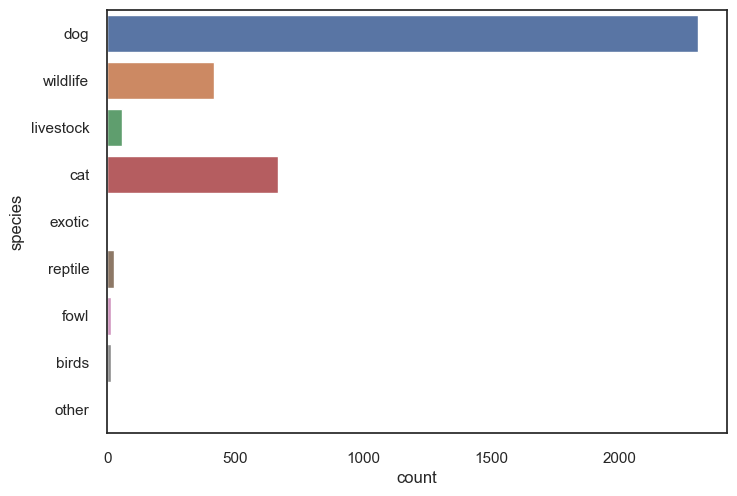

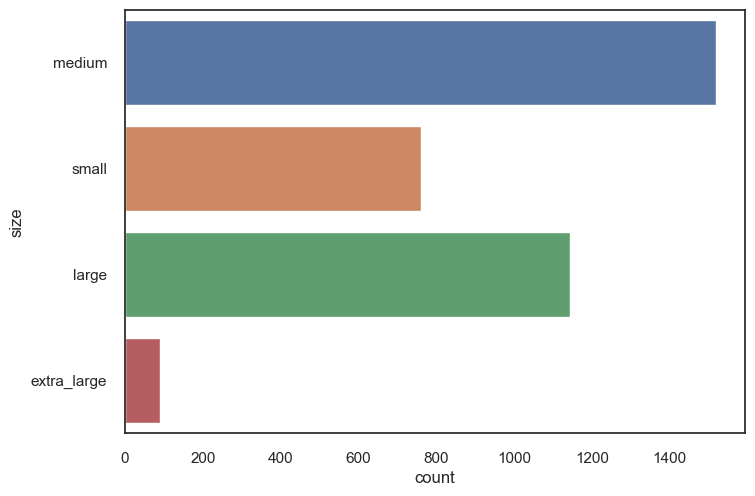

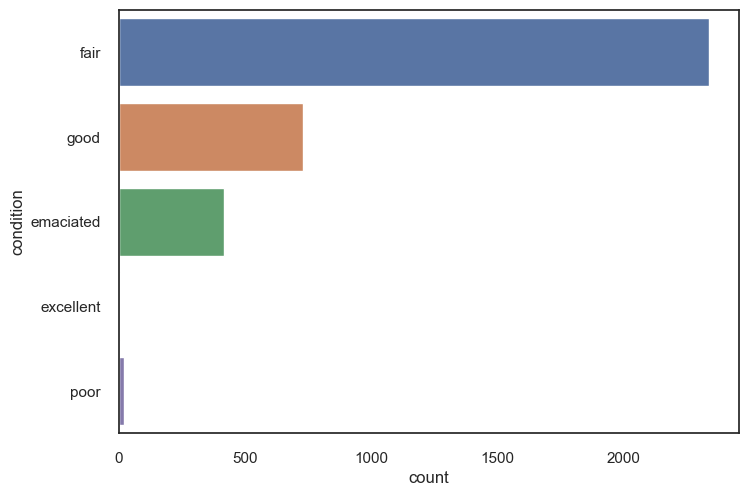

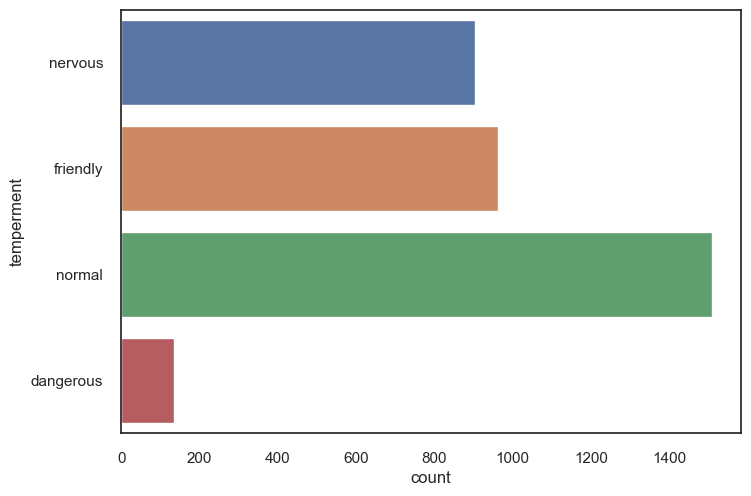

In [85]:
#value counts of species, size, condition, and temperment features
ssct_df = df[['species', 'size', 'condition', 'temperment']]

plot_counts(ssct_df)

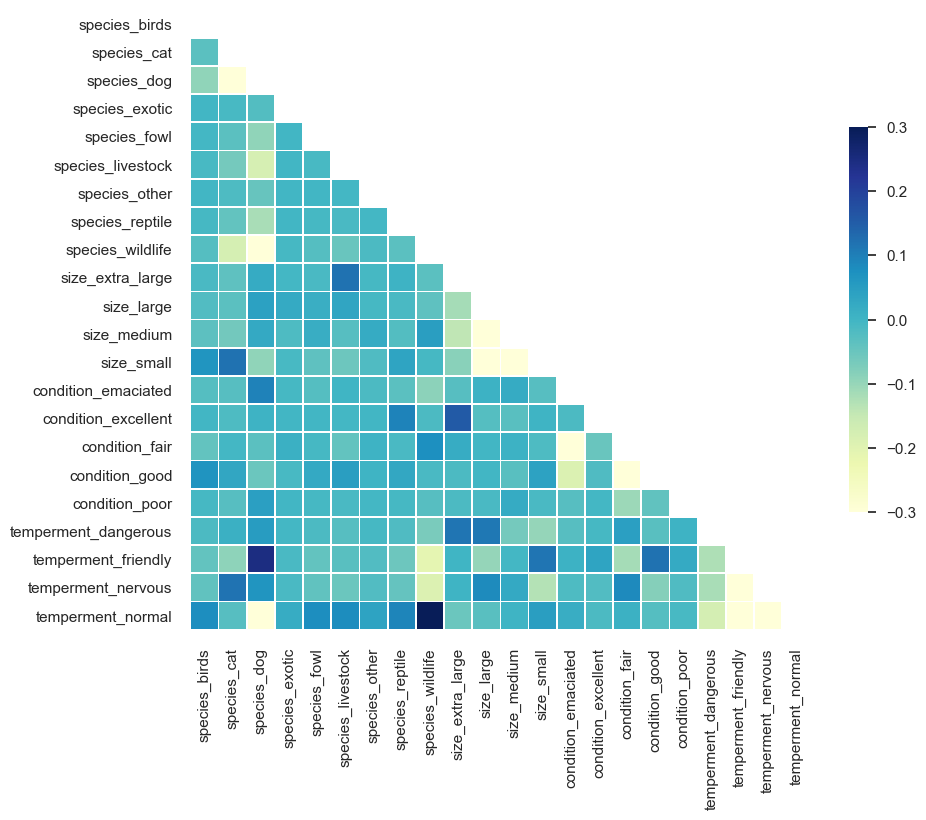

In [83]:
# correlations between species, size, condition, and temperment
corr_plot(ssct_df, -.3, .3)

since 'unknown' has such strong correlation, I'll be dropping

In [69]:
# drop rows with any unknowns
df = df[~df.eq('unknown').any(1)]

#### condition, temperment, size

In [70]:
df.condition.value_counts()

fair         2342
good          731
emaciated     417
poor           19
excellent       4
Name: condition, dtype: int64

In [71]:
df.temperment.value_counts()

normal       1509
friendly      964
nervous       904
dangerous     136
Name: temperment, dtype: int64

In [72]:
df['size'].value_counts()

medium         1518
large          1145
small           760
extra_large      90
Name: size, dtype: int64

In [73]:
#cts_df = df[['condition', 'temperment', 'size']]

#corr_plot(cts_df, -.3, .3)

### incident features

In [75]:
df.service_type.value_counts()

trapped_animal           657
stray                    582
stray_an_secured         329
loose                    222
unit_standing_by         219
owner_signed_release     213
abandoned_animal         197
injured                  166
cruelty                  153
bite_case_loose          145
stray_an._secured        104
wild_live                 93
animal_rescue             83
dangerous_animal_sit      70
special_case              65
bite_case_secure          58
loose_livestock           38
vet_pickup                30
sick_animal               27
snake                     26
school_call               15
dangerous_animal_sit.     15
bite_case                  4
owned                      1
dog_fighting               1
Name: service_type, dtype: int64

In [76]:
#df['service_type']=df['service_code'].mask(pd.isnull, df['request_type'])

In [77]:
df['service_type'] = df['service_type'].apply(lambda x: x.replace('stray_an._secured', 'stray_an_secured'))
df['service_type'] = df['service_type'].apply(lambda x: x.replace('dangerous_animal_sit.', 'dangerous_animal_sit'))

#### equipment number

In [78]:
df.equipment_number.value_counts()

ac12     545
ac13     491
ac04     415
ac01     405
ac09     378
ac11     270
ac15     223
ac19     194
ac18     167
ac10     137
ac06     127
ac16     103
ac20      41
ac14       8
ac_19      3
ac_18      2
ac05       2
ac6        1
ac07       1
Name: equipment_number, dtype: int64

In [79]:
#df.groupby(['zip_code'])['municipality_'].value_counts().unstack().plot.bar(figsize=(14,7));